### Student Information
Name: Miguel Avila

Student ID: 611421408

GitHub ID: MigzAvila

---

### Instructions

### First Phase Submission

1. First: do the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) that considered as **phase 1 (from exercise 1 to exercise 15)**. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: follow the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** up **until phase 1**. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    -  Use [the new dataset](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/newdataset/Reddit-stock-sentiment.csv). The dataset contains a 16 columns including 'text' and 'label', with the sentiment labels being: 1.0 is positive, 0.0 is neutral and -1.0 is negative. You can simplify the dataset and use only the columns that you think are necessary. 
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.
    - Use this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 10% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    


4. Fourth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__

You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (September 28th 11:59 pm, Sunday)__. 

### Second Phase Submission 

**You can keep the answer for phase 1 for easier running and update the phase 2 on the same page.**

1. First: Continue doing the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) for **phase 2, starting from Finding frequent patterns**. Use the same master(.ipynb) file. Answer from phase 1 will not be considered at this stage. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: Continue from first phase and do the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** for phase 2, starting from Finding frequent pattern. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    - Continue using this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output. Use the same new dataset as in phase 1.
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.

3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 20% of your grade.__
    - Use this file to answer.
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency).  Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences and when using augmentation with feature pattern.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__


You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 19th 11:59 pm, Sunday)__. 

# Phase 1

## Import all libraries

In [195]:
import pandas as pd
import numpy as np
import nltk
from sklearn.feature_extraction.text import CountVectorizer
import plotly as py
import math
import PAMI
import umap
# helper functions
import helpers.data_mining_helpers as dmh
 

## Import Data (Reddit data) - Data source - Data Preparation

In [196]:
### Begin Assignment Here
redditData = pd.read_csv('newdataset/Reddit-stock-sentiment.csv', encoding='utf-8') # import data from newdataset
print(redditData.shape) 
redditData[:5] # validate that data was imported correctly 

(847, 16)


,type,datetime,post_id,subreddit,title,author,url,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label
0,comment,2025-04-11 17:29:56,mmli62w,wallstreetbets,Retardation is on the menu boys! WSB is so back,StickyTip420,https://i.redd.it/0yq2ftren8ue1.jpeg,0,NaN,NaN,Calls on retards,1.000000,-0.900000,-1.0,[],-1.0
1,comment,2025-04-12 1:12:19,mmnu7v9,wallstreetbets,Retail giant TARGET has now declined for 10 co...,Comfortable-Dog-8437,https://i.redd.it/7tl6puv9waue1.jpeg,-15,NaN,NaN,Stunt as in like why did they even make a big ...,0.177778,0.083333,1.0,"['Stunt', 'company', 'deal', 'place']",0.0
2,comment,2025-04-10 15:09:41,mmeevio,StockMarket,How do you feel about a sitting president maki...,Btankersly66,https://apnews.com/article/trump-truth-social-...,1,NaN,NaN,Seeing lots of red in the ticker.,0.000000,0.000000,0.0,['ticker'],0.0
3,post,2023-08-30 17:12:55,165kllm,stockstobuytoday,Who knows more? $VMAR,emiljenfn,https://www.reddit.com/r/stockstobuytoday/comm...,30,0.0,0.98,Vision Marine Technologies Inc. is rewriting t...,0.646970,0.216383,1.0,"['watercraft', 'skill', 'power', ']', 'feat', ...",1.0
4,comment,2025-04-11 14:48:05,mmkl6bw,StockMarket,The Trump administration is begging Xi Jinping...,Just-Big6411,https://edition.cnn.com/2025/04/10/politics/tr...,1,NaN,NaN,He didn’t say thank you.,0.000000,0.000000,0.0,[],-1.0


### Data observation (Exploration)

In [197]:
columns = redditData.keys()
redditData.query("label == -1")

redditData.head(10)[["type","post_id","subreddit","title","url","upvotes","text","entities"]]
redditData.tail(10)[["type","post_id","subreddit","title","url","upvotes","text","entities"]]

redditData.loc[-10:, 'title']

0        Retardation is on the menu boys! WSB is so back
1      Retail giant TARGET has now declined for 10 co...
2      How do you feel about a sitting president maki...
3                                  Who knows more? $VMAR
4      The Trump administration is begging Xi Jinping...
                             ...                        
842    $MRIN Marin Software killed it today. Hope som...
843                       $ U.S. dollar value (crashing)
844                              Analyst Recommendations
845    Weekend Discussion Thread for the Weekend of A...
846                     Someone post the hotline please.
Name: title, Length: 847, dtype: object

### Some analysis with quering

In [198]:
# check if there any relationship with the post and comments
redditData.query("post_id == 'mmnu7v9'")[["subreddit","title","url","upvotes","text","entities"]]

# check if there any duplicates, that may indicate that there might be a relationship or duplicates
redditData.query("subreddit == 'StockMarket'")[["type","post_id","subreddit","title","url","upvotes","text","entities"]].duplicated()


2      False
4      False
18     False
26     False
32     False
       ...  
828    False
839    False
840    False
841    False
843    False
Length: 250, dtype: bool

In [199]:
# redditData.apply(lambda x: dmh.check_missing_values(x))
redditData.isnull().apply(lambda x: dmh.check_missing_values(x))
# As we can see, we are missing a lot of data when it comes to the upvotes and downvotes
# A possible solution is to drop these values

,type,datetime,post_id,subreddit,title,author,url,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0,0,0,0,0,0,783,783,0,0,0,0,0,0


### Cleaning the data for better analysis (Data Preparation)

In [200]:
redditData.apply(lambda x: dmh.check_missing_values(x), axis=1)
redditData.dropna(axis=1, inplace=True)
len(redditData)
redditData['subreddit'] = redditData['subreddit'].str.lower()
redditData.shape

(847, 14)

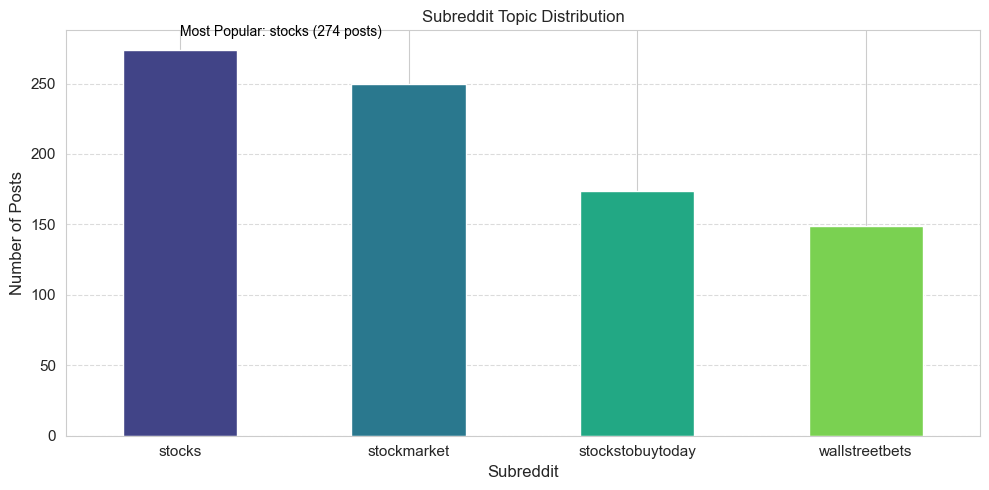

In [201]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Setting up a more vivid color for our charts
sns.set_style("whitegrid")
sns.set_palette("viridis") 

# Plot the value counts
ax = redditData['subreddit'].value_counts().plot(
    kind='bar',
    title='Subreddit Topic Distribution',
    rot=0,
    fontsize=11,
    figsize=(10, 5),  # Wider and taller for better readability
    color=sns.color_palette("viridis", n_colors=len(redditData['subreddit'].value_counts()))
)

# Add grid lines
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Improve labels
ax.set_xlabel('Subreddit', fontsize=12)
ax.set_ylabel('Number of Posts', fontsize=12)

# add note to the highest subreddit 
max_subreddit = redditData['subreddit'].value_counts().idxmax()
max_count = redditData['subreddit'].value_counts().max()
ax.annotate(
    f"Most Popular: {max_subreddit} ({max_count} posts)",
    xy=(0, max_count),  # Use numeric x position
    xytext=(0, 10),      # Offset text above the bar
    textcoords='offset points',
    fontsize=10,
    color='black'
)


# Adjust layout
plt.tight_layout()
plt.show()


### Sampling the data and comparing it to our main data

In [202]:
reddit_sample = redditData.sample(n=500) 
reddit_sample.shape

(500, 14)

<Axes: title={'center': 'Subreddit Distribution Comparision With Sample Data'}>

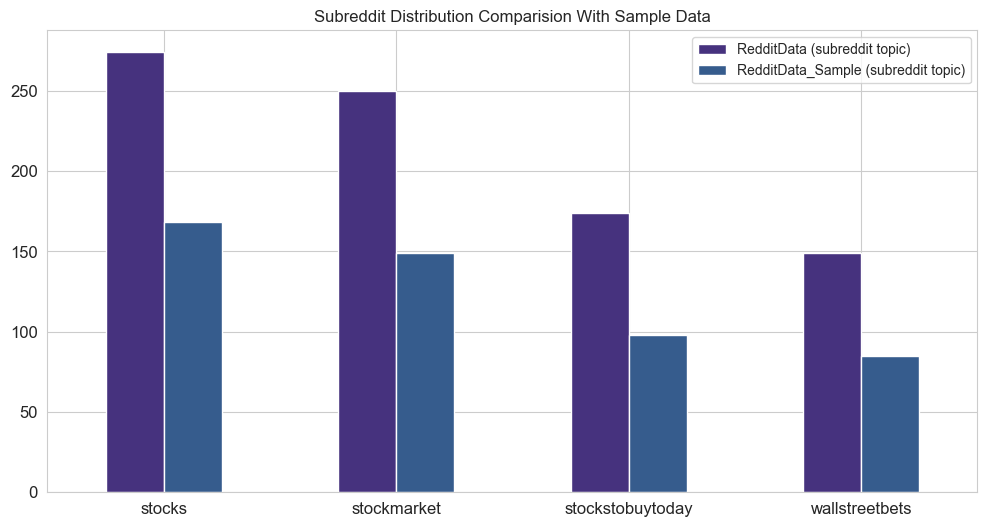

In [203]:
# Answer here .category_name.value_counts()
#Combine both data into a single dataframe for plotting
summaryCounts = pd.DataFrame({
    "RedditData (subreddit topic)": redditData.subreddit.value_counts(),
    "RedditData_Sample (subreddit topic)": reddit_sample.subreddit.value_counts()
})

# plot the dataframe
summaryCounts.plot(kind = 'bar',
                    title = 'Subreddit Distribution Comparision With Sample Data', 
                       xlabel="",
                       rot = 0, fontsize = 12, figsize = (12,6))

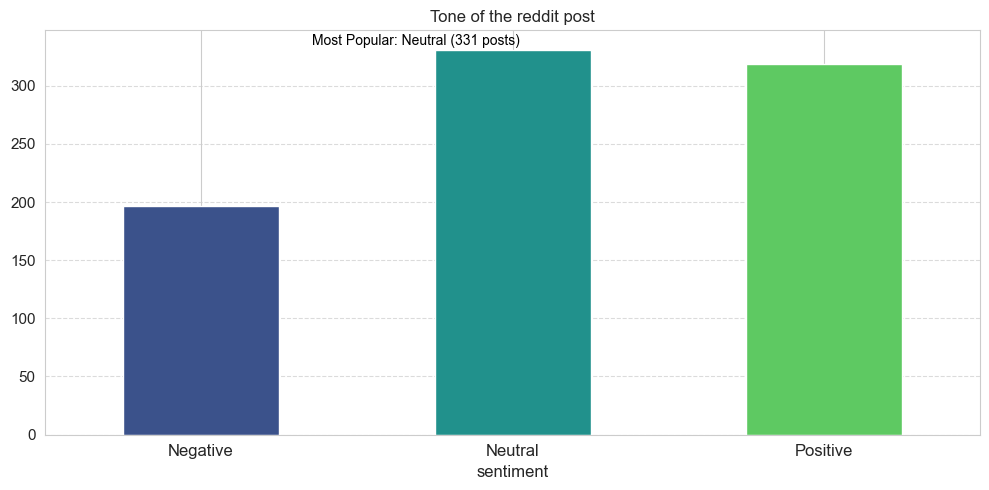

In [204]:
#Checking out other data
# Providing values to the x axis
sentiment_labels = {
    -1: "Negative",
     0: "Neutral",
     1: "Positive"
}
# Getting summary count of the values (-1, 0, 1)
summaryCounts = redditData['sentiment'].value_counts()
# reorder the columns
order = [-1, 0, 1] 
summaryCounts = summaryCounts.reindex(order)


# Plot the value counts
ax = summaryCounts.plot(
    kind='bar',
    title='Tone of the reddit post',
    rot=0,
    fontsize=11,
    figsize=(10, 5),  # Wider and taller for better readability
    color=sns.color_palette("viridis", n_colors=len(redditData['label'].value_counts()))
)

# Add grid lines
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Improve labels
ax.set_xlabel('sentiment', fontsize=12)

# Apply custom x-tick labels
ax.set_xticks(range(len(summaryCounts.index)))
ax.set_xticklabels([sentiment_labels[val] for val in summaryCounts.index], fontsize=12)

# add note to the highest subreddit 
max_subreddit = summaryCounts.idxmax()
max_count = summaryCounts.max()
ax.annotate(
    f"Most Popular: {sentiment_labels[max_subreddit]} ({max_count} posts)",
    xy=(0, max_count),  # Use numeric x position
    xytext=(80, 3),      # Offset text above the bar
    textcoords='offset points',
    fontsize=10,
    color='black'
)


# Adjust layout
plt.tight_layout()
plt.show()


In [205]:
# Print some sample posts for each sentiment category
for sentiment_value, label in sentiment_labels.items():
    print(f"\n--- {label} samples ---")
    # Filter the dataframe for the current sentiment
    subset = redditData[redditData['sentiment'] == sentiment_value]
    # Take up to 3 random samples (or fewer if there aren't enough)
    samples = subset['text'].sample(min(3, len(subset)), random_state=42)
    for i, text in enumerate(samples, 1):
        print(f"{i}. {text}\n")



--- Negative samples ---
1. Years ago I found Kate Rooney’s instagram.

Private, but I requested anyway.

When she got married she went public and it auto approved all of the pending follow requests. 

I was in. I couldn’t believe it. My CNBC crush. She was so hot.

Just noticed today that she removed me. While sad, the fact that she had to see my profile and click remove means she knows I exist. Small Ws

2. Look up "Dark Gothic MAGA how Tech billionaires plan to destroy America" on YouTube. Personal enrichment is just a stepping stone. The end goal is dissolution of the US, to be replaced by libertarian Blockchain nonsense.

3. His plan is "fuck you, be less poor"


--- Neutral samples ---
1. Oh my gourd!

2. I currently own 

* TSLA
* FB
* BABA
* BP
* AUY

I hoep this helps.  I plan to take more profits 11/5 at the 1242.00 price range

3. China will fold and Trump will get the W he wants.


--- Positive samples ---
1. Well, they wanted to devalue USD, so now they got it... 

But ge

In [206]:
# Print some sample posts for each labels category
for sentiment_value, label in sentiment_labels.items():
    print(f"\n--- {label} samples ---")
    # Filter the dataframe for the current sentiment
    subset = redditData[redditData['label'] == sentiment_value]
    # Take up to 3 random samples (or fewer if there aren't enough)
    samples = subset['text'].sample(min(3, len(subset)), random_state=42)
    for i, text in enumerate(samples, 1):
        print(f"{i}. {text}\n")



--- Negative samples ---
1. China has been preparing for this and this administration lies, is terrible at negotiating, and cannot be trusted with an so-called *deals.*

This administration is barely treading water and is likely to bring the United Sates into a deep recession whilst simultaneously claiming victory and blaming previous administrations along the meat. The U.S. willingly chose this.

2. Do we have a copy of trump’s kindergarten graduation certificate? Ideally the long form version.

3. It was so blatant.  In a normal version of the US, this is exactly what the SEC would be prosecuting.   But thanks to SCOTUS making the Presidency a flawless monarchy unable to commit crime, nothing will happen.


--- Neutral samples ---
1. What are we gonna call it when Wendy's is gone.

2. All proceeds from elected officials and those appointed performing official acts should go to the public treasury.

3. Updated Daily by EOD

  
[Daily Shorts]()


--- Positive samples ---
1. Nah he's p

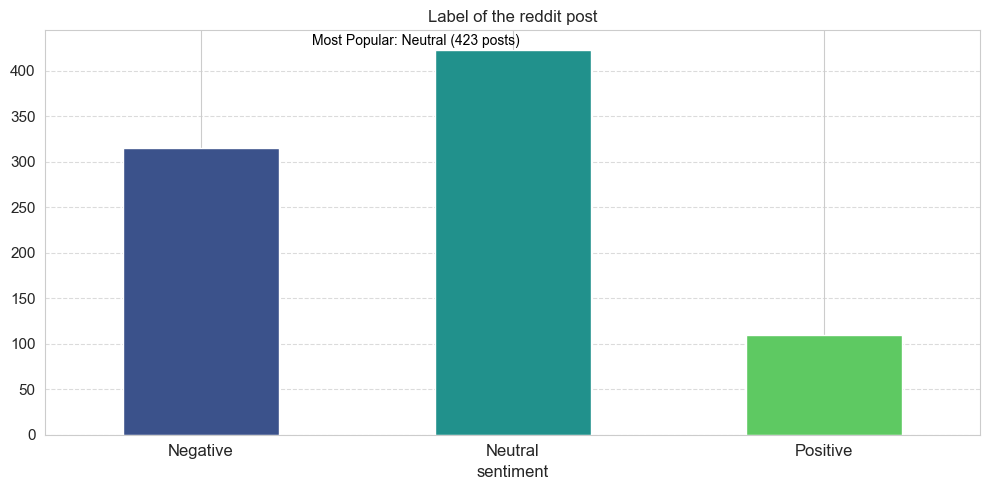

In [207]:
#Checking out other data
# Providing values to the x axis
sentiment_labels = {
    -1: "Negative",
     0: "Neutral",
     1: "Positive"
}
# Getting summary count of the values (-1, 0, 1)
summaryCounts = redditData['label'].value_counts()
# reorder the columns
order = [-1, 0, 1] 
summaryCounts = summaryCounts.reindex(order)


# Plot the value counts
ax = summaryCounts.plot(
    kind='bar',
    title='Label of the reddit post',
    rot=0,
    fontsize=11,
    figsize=(10, 5),  # Wider and taller for better readability
    color=sns.color_palette("viridis", n_colors=len(redditData['label'].value_counts()))
)

# Add grid lines
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Improve labels
ax.set_xlabel('sentiment', fontsize=12)

# Apply custom x-tick labels
ax.set_xticks(range(len(summaryCounts.index)))
ax.set_xticklabels([sentiment_labels[val] for val in summaryCounts.index], fontsize=12)

# add note to the highest subreddit 
max_subreddit = summaryCounts.idxmax()
max_count = summaryCounts.max()
ax.annotate(
    f"Most Popular: {sentiment_labels[max_subreddit]} ({max_count} posts)",
    xy=(0, max_count),  # Use numeric x position
    xytext=(80, 3),      # Offset text above the bar
    textcoords='offset points',
    fontsize=10,
    color='black'
)


# Adjust layout
plt.tight_layout()
plt.show()


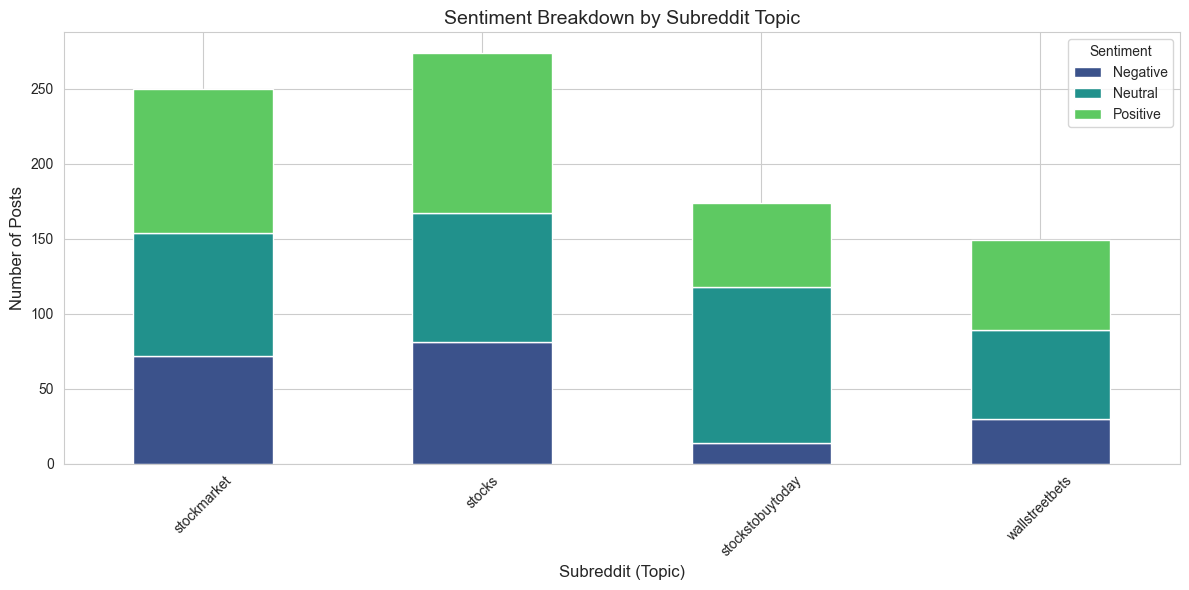

In [208]:
# Group subreddit by sentiment
subreddit_sentiment = redditData.groupby(["subreddit", "sentiment"]).size().unstack(fill_value=0)

# Reorder columns by sentiment order
subreddit_sentiment = subreddit_sentiment[order]  # order = [-1, 0, 1]

# Plot stacked bar chart
ax = subreddit_sentiment.plot(
    kind="bar",
    stacked=True,
    figsize=(12, 6),
    color=sns.color_palette("viridis", n_colors=3),
    rot=45
)

# Labels & title
ax.set_xlabel("Subreddit (Topic)", fontsize=12)
ax.set_ylabel("Number of Posts", fontsize=12)
ax.set_title("Sentiment Breakdown by Subreddit Topic", fontsize=14)

# Replace legend values with readable labels
ax.legend([sentiment_labels[val] for val in order], title="Sentiment")

plt.tight_layout()
plt.show()


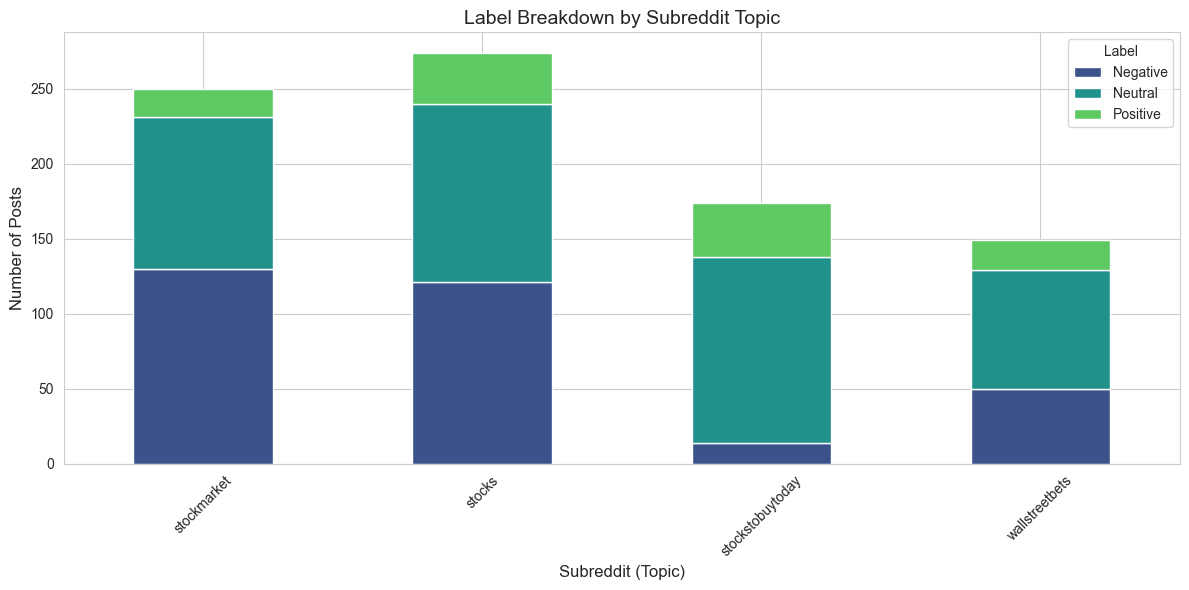

In [209]:
# Group subreddit by label
subreddit_sentiment = redditData.groupby(["subreddit", "label"]).size().unstack(fill_value=0)

# Reorder columns by sentiment order
subreddit_sentiment = subreddit_sentiment[order]  # order = [-1, 0, 1]

# Plot stacked bar chart
ax = subreddit_sentiment.plot(
    kind="bar",
    stacked=True,
    figsize=(12, 6),
    color=sns.color_palette("viridis", n_colors=3),
    rot=45
)

# Labels & title
ax.set_xlabel("Subreddit (Topic)", fontsize=12)
ax.set_ylabel("Number of Posts", fontsize=12)
ax.set_title("Label Breakdown by Subreddit Topic", fontsize=14)

# Replace legend values with readable labels
ax.legend([sentiment_labels[val] for val in order], title="Label")

plt.tight_layout()
plt.show()

Number of negative posts: 197


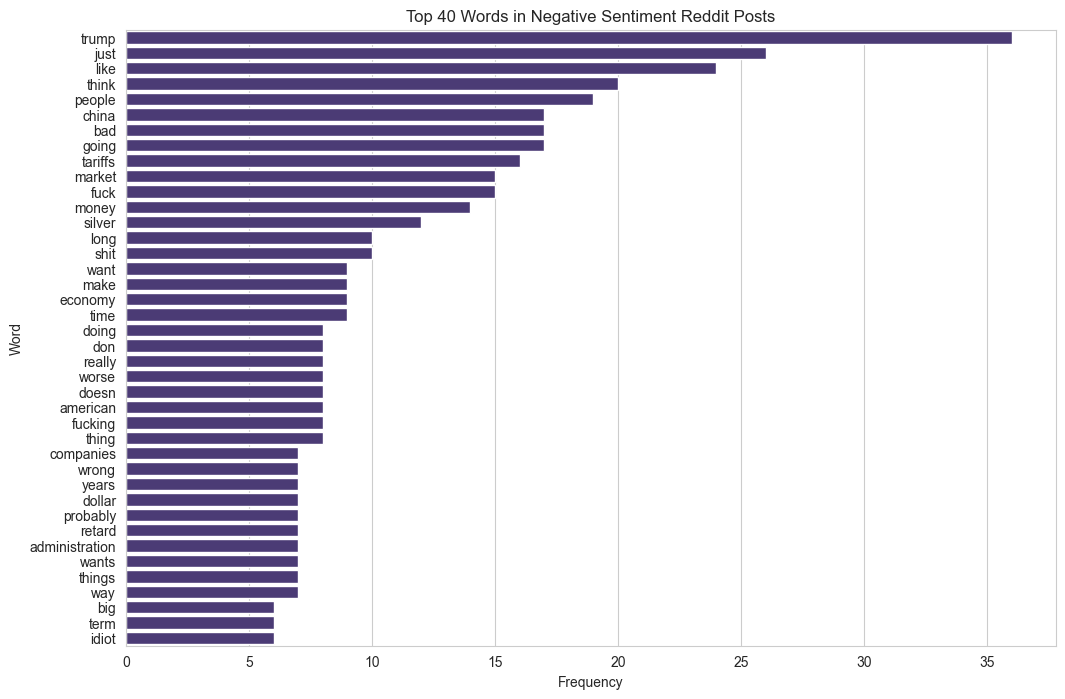

In [210]:
# Filter only negative sentiment posts
stocksNegativePost = redditData.query("sentiment == -1")
print("Number of negative posts:", len(stocksNegativePost))

# Vectorize the text (all negative posts)
count_vect = CountVectorizer(stop_words="english")
stocksNegativePost_counts = count_vect.fit_transform(stocksNegativePost["text"])

# Get total word frequencies
word_freq = np.asarray(stocksNegativePost_counts.sum(axis=0)).flatten()
terms = count_vect.get_feature_names_out()

# Build DataFrame
freq_df = pd.DataFrame({"term": terms, "frequency": word_freq})

# Get top 40
top40 = freq_df.sort_values(by="frequency", ascending=False).head(40)

# --- Plot ---
plt.figure(figsize=(12, 8))
sns.barplot(
    data=top40,
    x="frequency",
    y="term",
    hue=None 
)
plt.title("Top 40 Words in Negative Sentiment Reddit Posts")
plt.xlabel("Frequency")
plt.ylabel("Word")
plt.show()



Number of negative posts: 315


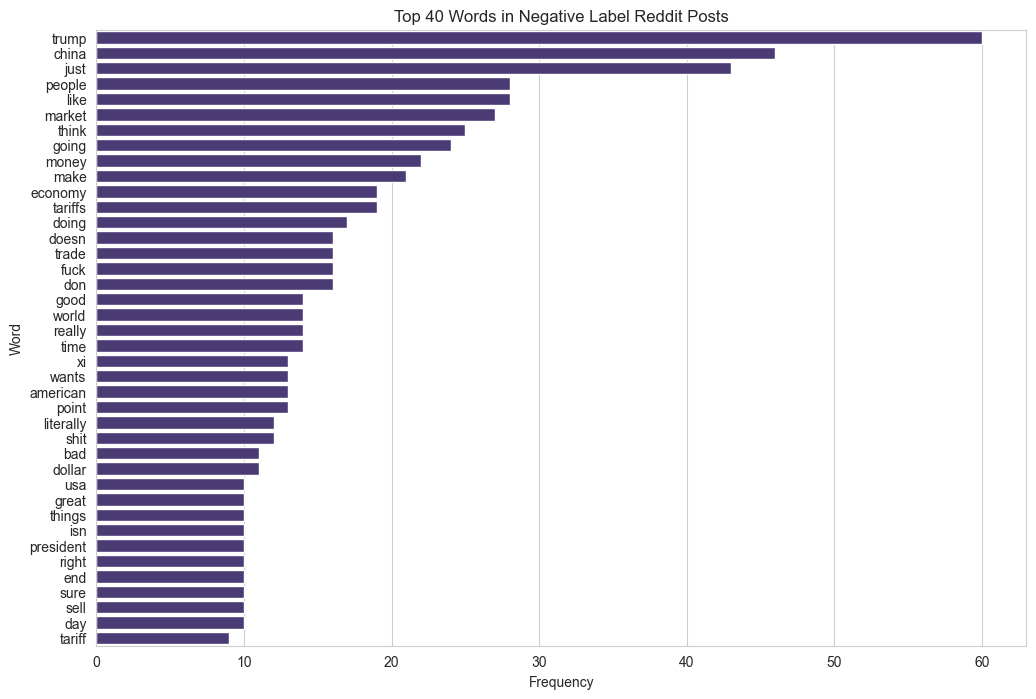

In [211]:
# Filter only negative sentiment posts
stocksNegativePost = redditData.query("label == -1")
print("Number of negative posts:", len(stocksNegativePost))

# Vectorize the text (all negative posts)
count_vect = CountVectorizer(stop_words="english")
stocksNegativePost_counts = count_vect.fit_transform(stocksNegativePost["text"])

# Get total word frequencies
word_freq = np.asarray(stocksNegativePost_counts.sum(axis=0)).flatten()
terms = count_vect.get_feature_names_out()

# Build DataFrame
freq_df = pd.DataFrame({"term": terms, "frequency": word_freq})

# Get top 40
top40 = freq_df.sort_values(by="frequency", ascending=False).head(40)

# --- Plot ---
plt.figure(figsize=(12, 8))
sns.barplot(
    data=top40,
    x="frequency",
    y="term",
    hue=None  
)
plt.title("Top 40 Words in Negative Label Reddit Posts")
plt.xlabel("Frequency")
plt.ylabel("Word")
plt.show()



### Now that I see some correlation between the negative post from the label and the sentiment, we can create a graph to see the similarities and see the most used words

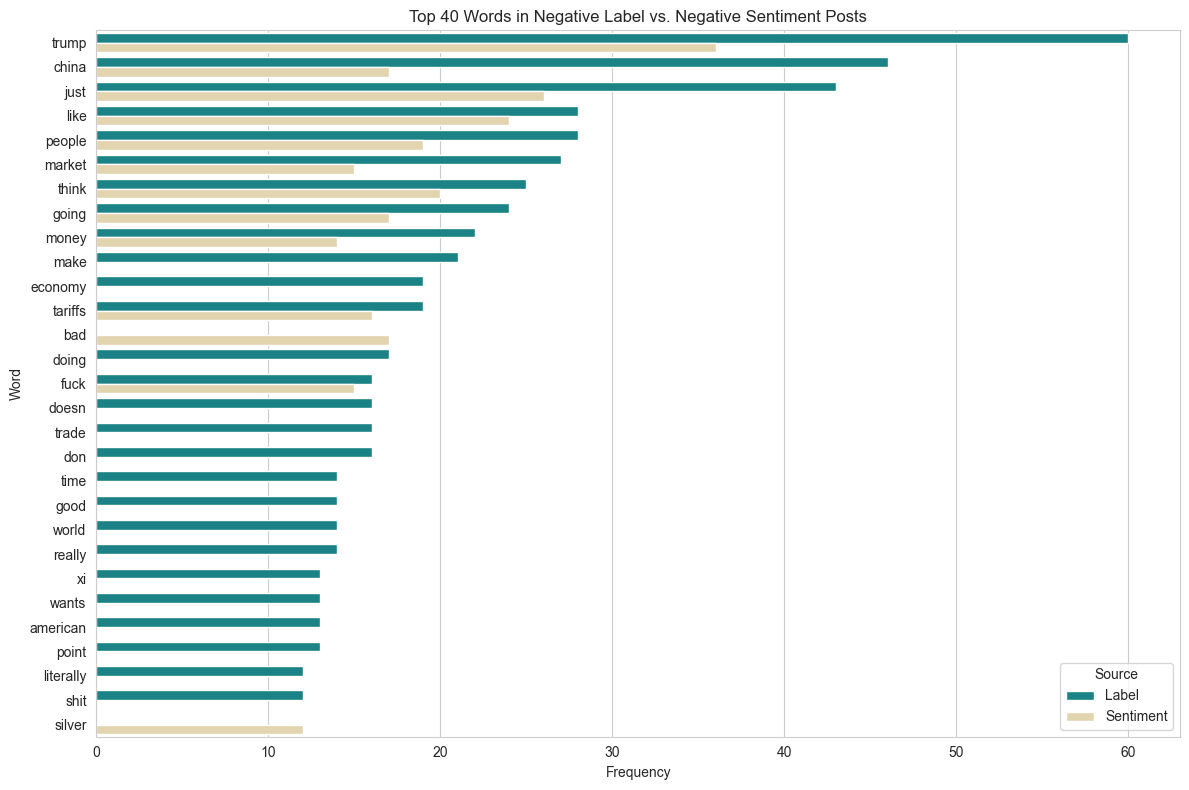

In [212]:
# Filter negative label posts
label_negative = redditData.query("label == -1")
label_freq = np.asarray(count_vect.fit_transform(label_negative["text"]).sum(axis=0)).flatten()
label_terms = count_vect.get_feature_names_out()
label_df = pd.DataFrame({
"term": label_terms,
"frequency": label_freq
})
label_top40 = label_df.sort_values(by="frequency", ascending=False).head(40)

# Filter negative sentiment posts
sentiment_negative = redditData.query("sentiment == -1")
sentiment_freq = np.asarray(count_vect.fit_transform(sentiment_negative["text"]).sum(axis=0)).flatten()
sentiment_terms = count_vect.get_feature_names_out()
sentiment_df = pd.DataFrame({
"term": sentiment_terms,
"frequency": sentiment_freq
})
sentiment_top40 = sentiment_df.sort_values(by="frequency", ascending=False).head(40)

# Combine both datasets
combined_df = pd.concat([
label_top40.assign(source="Label"),
sentiment_top40.assign(source="Sentiment")
]).sort_values(by="frequency", ascending=False).head(40)

# Plot grouped bar chart
plt.figure(figsize=(12, 8))
sns.barplot(
data=combined_df,
x="frequency",
y="term",
hue="source",
palette = ["#0a9396", "#e9d8a6"]  # Coral Red & Light Red


)
plt.title("Top 40 Words in Negative Label vs. Negative Sentiment Posts")
plt.xlabel("Frequency")
plt.ylabel("Word")
plt.legend(title="Source")
plt.tight_layout()
plt.show()


### Using the long tail method

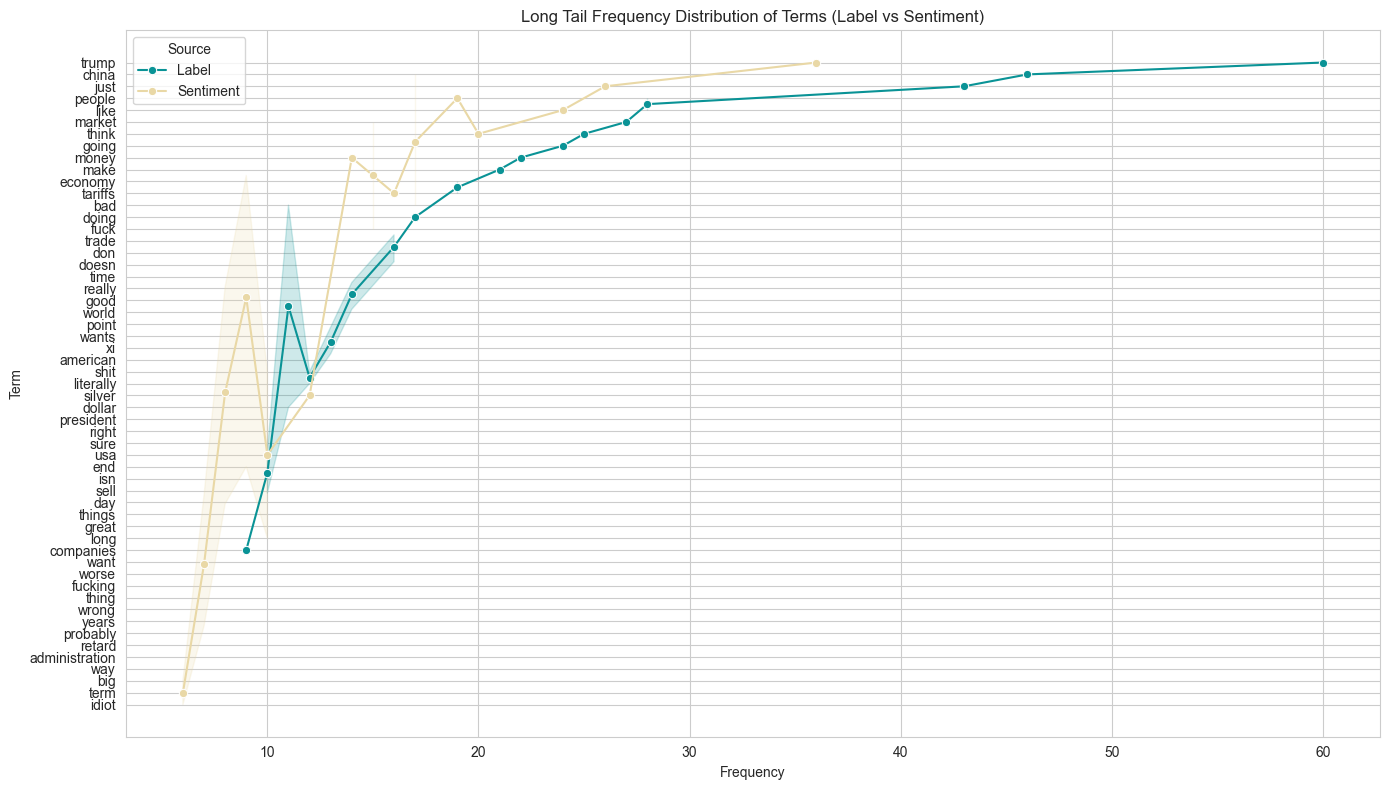

In [213]:

# Step 1: Process all terms from both datasets
label_freq = np.asarray(count_vect.transform(label_negative["text"]).sum(axis=0)).flatten()
label_terms = count_vect.get_feature_names_out()
label_df = pd.DataFrame({
    "term": label_terms,
    "frequency": label_freq
})
label_top40 = label_df.sort_values(by="frequency", ascending=False).head(40)

sentiment_freq = np.asarray(count_vect.transform(sentiment_negative["text"]).sum(axis=0)).flatten()
sentiment_terms = count_vect.get_feature_names_out()
sentiment_df = pd.DataFrame({
    "term": sentiment_terms,
    "frequency": sentiment_freq
})
sentiment_top40 = sentiment_df.sort_values(by="frequency", ascending=False).head(40)

# Step 2: Combine into one DataFrame with source info
combined_df = pd.concat([
    label_top40.assign(source="Label"),
    sentiment_top40.assign(source="Sentiment")
])

# Step 3: Sort by frequency (descending)
combined_df = combined_df.sort_values(by="frequency", ascending=False)

# Step 4: Plot as a long tail (line chart)
plt.figure(figsize=(14, 8))
sns.lineplot(
    data=combined_df,
    x="frequency",  # Frequency on x-axis
    y="term",       # Term names on y-axis
    hue="source",   # Differentiate sources
    marker="o",
    palette=["#0a9396", "#e9d8a6"]
)

# Adjust layout for clarity
plt.title("Long Tail Frequency Distribution of Terms (Label vs Sentiment)")
plt.xlabel("Frequency")
plt.ylabel("Term")
plt.legend(title="Source")
plt.tight_layout()
plt.show()


### Using math log in our data

In [214]:
term_frequencies = np.asarray(stocksNegativePost_counts.sum(axis=0))[0]
term_frequencies_log = [math.log(i) for i in term_frequencies]

C:\Users\migue\AppData\Local\Temp\ipykernel_11780\2166548998.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);


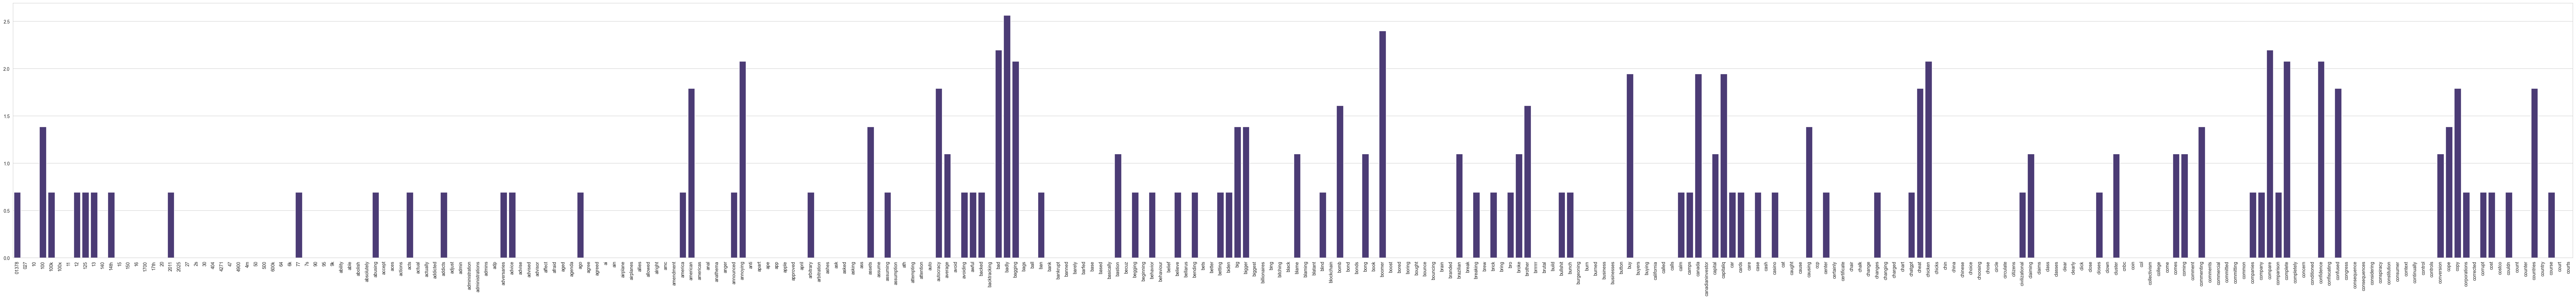

In [215]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300],
                y=term_frequencies_log[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);

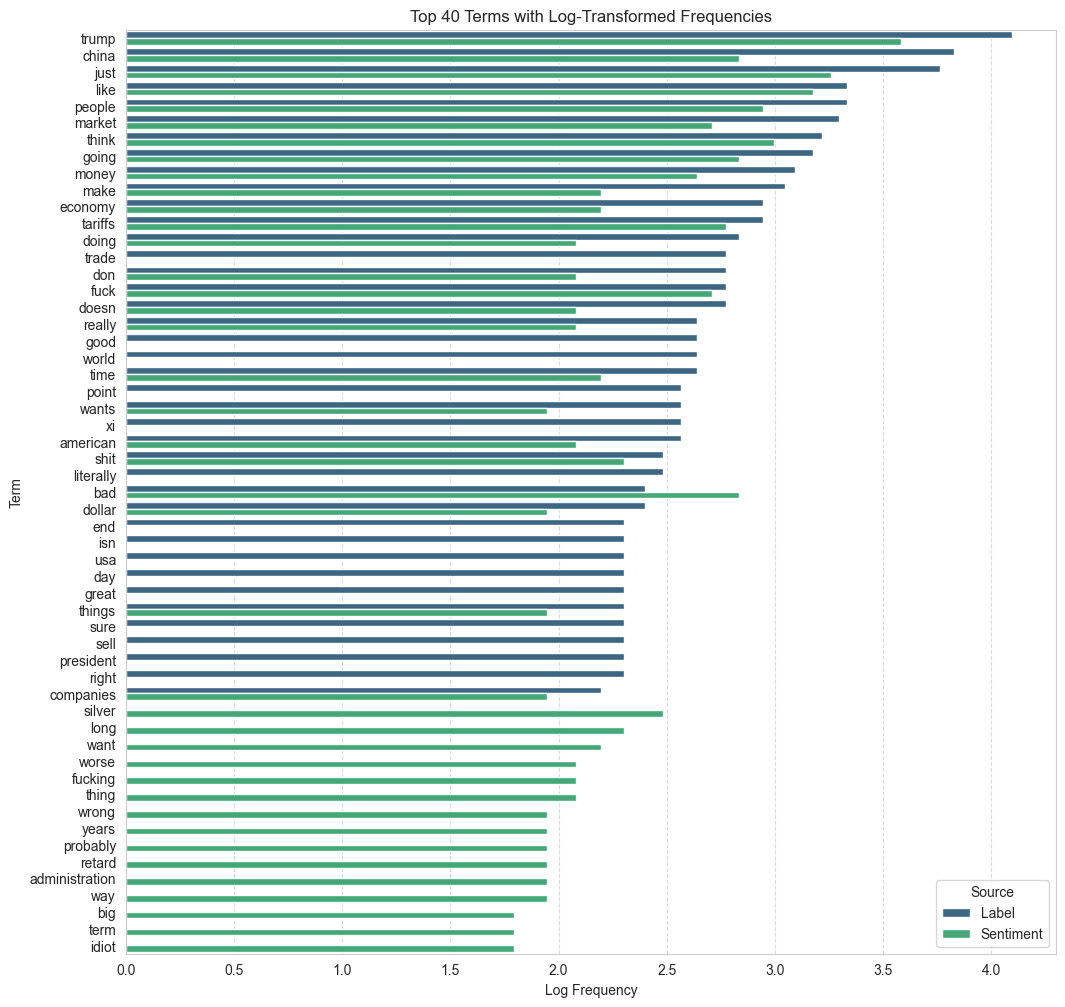

In [216]:
# Filter negative label posts
label_negative = redditData.query("label == -1")
label_freq = np.asarray(count_vect.transform(label_negative["text"]).sum(axis=0)).flatten()
label_terms = count_vect.get_feature_names_out()
label_df = pd.DataFrame({
    "term": label_terms,
    "frequency": label_freq
})
label_top40 = label_df.sort_values(by="frequency", ascending=False).head(40)

# Filter negative sentiment posts
sentiment_negative = redditData.query("sentiment == -1")
sentiment_freq = np.asarray(count_vect.transform(sentiment_negative["text"]).sum(axis=0)).flatten()
sentiment_terms = count_vect.get_feature_names_out()
sentiment_df = pd.DataFrame({
    "term": sentiment_terms,
    "frequency": sentiment_freq
})
sentiment_top40 = sentiment_df.sort_values(by="frequency", ascending=False).head(40)

# Combine both datasets
combined_df = pd.concat([
    label_top40.assign(source="Label"),
    sentiment_top40.assign(source="Sentiment")
])

# Apply logarithmic transformation to frequency
combined_df["frequency"] = [math.log(f) for f in combined_df["frequency"]]

# Plot the bar chart using log-transformed frequencies
plt.figure(figsize=(12, 12))
sns.barplot(x="frequency", y="term", hue="source", data=combined_df, palette="viridis")
plt.title("Top 40 Terms with Log-Transformed Frequencies")
plt.xlabel("Log Frequency")
plt.ylabel("Term")
plt.legend(title="Source")
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()


# Phase 2

In [217]:
### Begin Assignment Here